# Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
calories_df = pd.read_csv('./data/Calories/calories.csv')
exercise_df = pd.read_csv('./data/Calories/exercise.csv')

In [3]:
df = pd.merge(calories_df, exercise_df, on='User_ID')

In [4]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df.dtypes

User_ID         int64
Calories      float64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

In [6]:
# Gender is obviously not a numeric value. It's a category, it's a categorical variable. So let's make it categorical.
df['Gender'] = pd.Categorical(df.Gender)

In [7]:
import seaborn as sns
from matplotlib import pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [8]:
df.dtypes

User_ID          int64
Calories       float64
Gender        category
Age              int64
Height         float64
Weight         float64
Duration       float64
Heart_Rate     float64
Body_Temp      float64
dtype: object

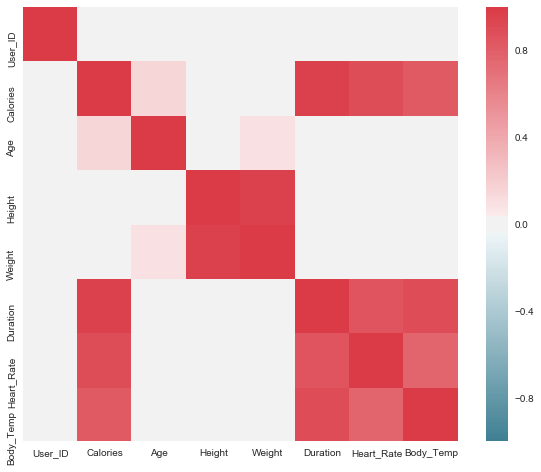

In [9]:
import seaborn as sns
from matplotlib import pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

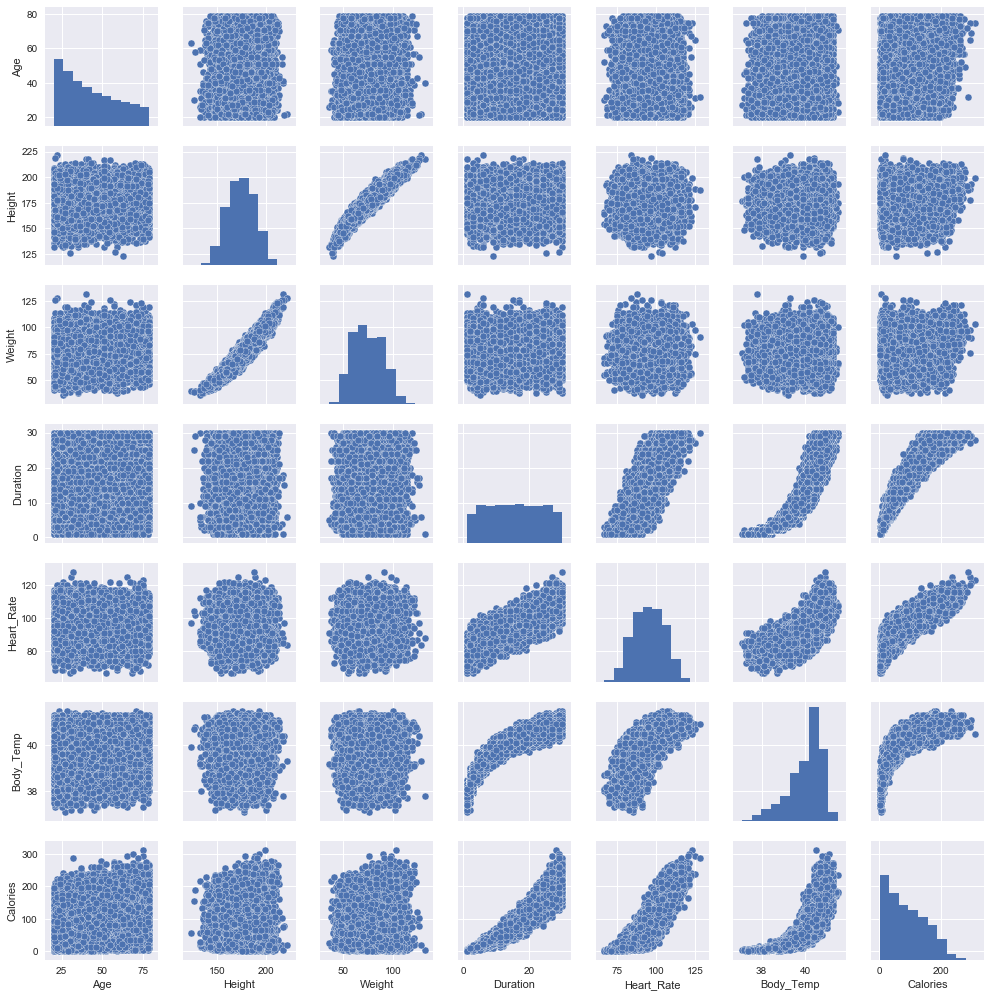

In [10]:
# Create a scatter plot matrix
%matplotlib inline

import seaborn as sns
num_cols = ["Age", "Height", "Weight", "Duration",
            "Heart_Rate", "Body_Temp", "Calories"] 
sns.pairplot(df[num_cols], size=2)

In [11]:
df['Power_Duration'] =  np.power(df['Duration'],2 )
df['Power_Heart_Rate'] =   np.power(df['Heart_Rate'] ,2)

In [12]:
# To make sure that we don't predict any negative calories, because of course, we can't burn negative calories. So we're converting that to a log so that our prediction will
# actually be log of calories, rather than calories, and it will always be a positive number.
df['ln_Calories'] = np.log(df['Calories'])

In [13]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Power_Duration,Power_Heart_Rate,ln_Calories
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8,841.0,11025.0,5.442418
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3,196.0,8836.0,4.189655
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7,25.0,7744.0,3.258097
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5,169.0,10000.0,4.262680
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8,100.0,6561.0,3.555348


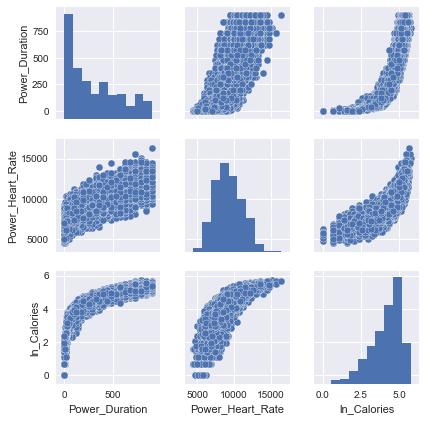

In [14]:
# Create a scatter plot matrix
%matplotlib inline

import seaborn as sns
num_cols = ["Power_Duration","Power_Heart_Rate","ln_Calories"] 
sns.pairplot(df[num_cols], size=2)

In [15]:
from scipy import stats
from scipy.stats import zscore
df[['Height','Weight', 'Heart_Rate','Body_Temp']] = df[['Height','Weight', 'Heart_Rate','Body_Temp']].apply(zscore)

In [17]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Power_Duration,Power_Heart_Rate,ln_Calories
0,14733363,231.0,male,68,1.089582,1.265909,29.0,0.989404,0.994023,841.0,11025.0,5.442418
1,14861698,66.0,female,20,-0.593726,-0.995458,14.0,-0.158461,0.352342,196.0,8836.0,4.189655
2,11179863,26.0,male,69,0.318066,0.268247,5.0,-0.784569,-1.701035,25.0,7744.0,3.258097
3,16180408,71.0,female,34,0.318066,-0.263839,13.0,0.467647,0.609015,169.0,10000.0,4.262680
4,17771927,35.0,female,27,-1.435380,-1.128480,10.0,-1.515029,-0.289338,100.0,6561.0,3.555348


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df[['Age','Duration']] = scaler.fit_transform(df[['Age','Duration']])

In [20]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Power_Duration,Power_Heart_Rate,ln_Calories
0,14733363,231.0,male,0.813559,1.089582,1.265909,0.965517,0.989404,0.994023,841.0,11025.0,5.442418
1,14861698,66.0,female,0.000000,-0.593726,-0.995458,0.448276,-0.158461,0.352342,196.0,8836.0,4.189655
2,11179863,26.0,male,0.830508,0.318066,0.268247,0.137931,-0.784569,-1.701035,25.0,7744.0,3.258097
3,16180408,71.0,female,0.237288,0.318066,-0.263839,0.413793,0.467647,0.609015,169.0,10000.0,4.262680
4,17771927,35.0,female,0.118644,-1.435380,-1.128480,0.310345,-1.515029,-0.289338,100.0,6561.0,3.555348


In [36]:
x = df.iloc[:,6:-3].values
y= df.iloc[:,-1].values

In [37]:
# Split the data into Training and Testing set
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
linear_model =classifier.fit(x_train,y_train)

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = np.exp(classifier.predict(x_test))

In [56]:
linear_model.score(x_test,y_test)

0.9383526185672361